In [4]:
import os
import requests
from bs4 import BeautifulSoup

# URL of the webpage
url = "https://www.cs.cmu.edu/afs/cs.cmu.edu/project/theo-8/faceimages/faces/steffi/"

# Directory to save downloaded files
directory = "/content/predict"

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find all <tr> elements starting from the 4th <tr>
    rows = soup.find_all('tr')[3:]

    # Iterate through each <tr> element
    for row in rows:
        try:
            # Find the 2nd <td> element within the <tr>
            td = row.find_all('td')[1]

            # Find the <a> tag within the <td>
            a = td.find('a')

            # Get the href attribute value
            href = a.get('href')

            # Download the .pgm file
            file_url = f"{url}/{href}"
            filename = href.split("/")[-1]
            filepath = os.path.join(directory, filename)

            # Send a GET request to download the file
            file_response = requests.get(file_url)

            # Save the file to the directory
            with open(filepath, "wb") as file:
                file.write(file_response.content)

            print(f"Downloaded: {filename}")
        except IndexError:
            print(f"Completed downloading from {url}")
else:
    print("Failed to fetch webpage.")


Downloaded: steffi_left_angry_open.pgm
Downloaded: steffi_left_angry_open_2.pgm
Downloaded: steffi_left_angry_open_4.pgm
Downloaded: steffi_left_angry_sunglasses.pgm
Downloaded: steffi_left_angry_sunglasses_2.pgm
Downloaded: steffi_left_angry_sunglasses_4.pgm
Downloaded: steffi_left_happy_open.pgm
Downloaded: steffi_left_happy_open_2.pgm
Downloaded: steffi_left_happy_open_4.pgm
Downloaded: steffi_left_happy_sunglasses.pgm
Downloaded: steffi_left_happy_sunglasses_2.pgm
Downloaded: steffi_left_happy_sunglasses_4.pgm
Downloaded: steffi_left_neutral_open.pgm
Downloaded: steffi_left_neutral_open_2.pgm
Downloaded: steffi_left_neutral_open_4.pgm
Downloaded: steffi_left_neutral_sunglasses.pgm
Downloaded: steffi_left_neutral_sunglasses_2.pgm
Downloaded: steffi_left_neutral_sunglasses_4.pgm
Downloaded: steffi_left_sad_open.pgm
Downloaded: steffi_left_sad_open_2.pgm
Downloaded: steffi_left_sad_open_4.pgm
Downloaded: steffi_left_sad_sunglasses.pgm
Downloaded: steffi_left_sad_sunglasses_2.pgm
Downl

Model loaded from /googledrive/MyDrive/GSSOC24/ThereForYou/neural_network_model.pkl


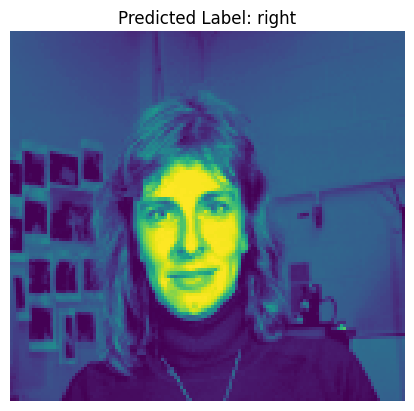

File Name: steffi_straight_sad_open.pgm
Predicted Label: right


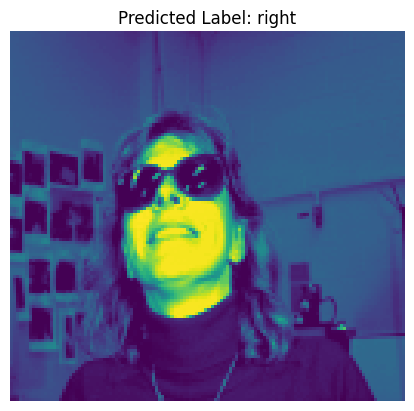

File Name: steffi_up_happy_sunglasses.pgm
Predicted Label: right


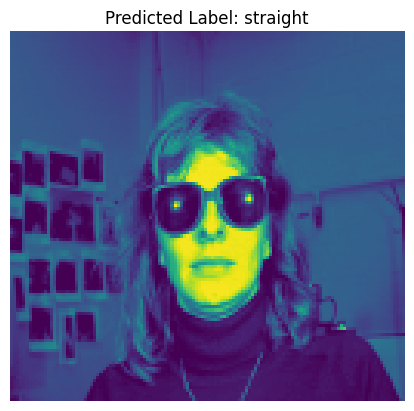

File Name: steffi_straight_neutral_sunglasses.pgm
Predicted Label: straight


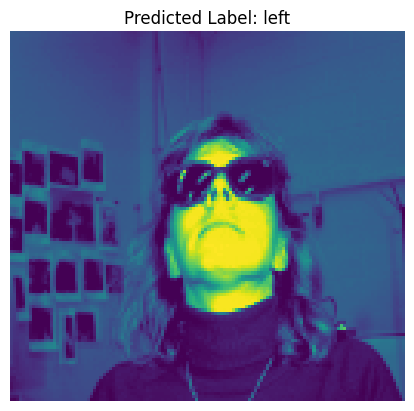

File Name: steffi_up_angry_sunglasses.pgm
Predicted Label: left


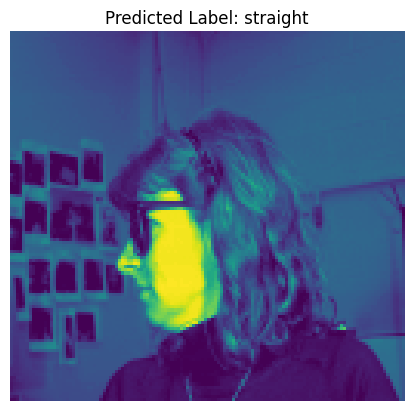

File Name: steffi_right_angry_sunglasses.pgm
Predicted Label: straight


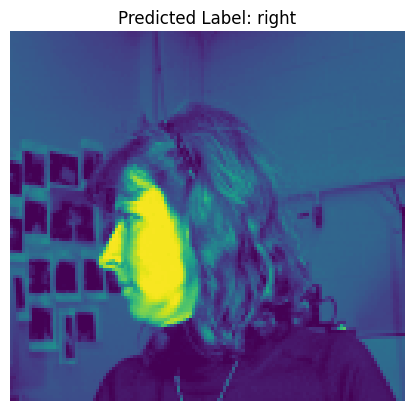

File Name: steffi_right_angry_open.pgm
Predicted Label: right


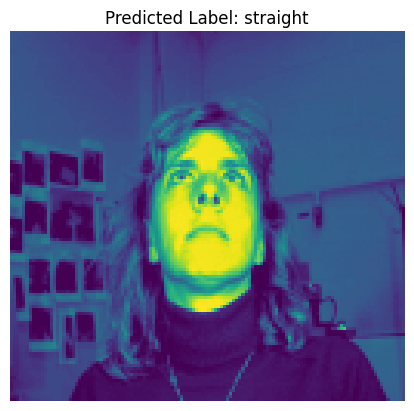

File Name: steffi_up_sad_open.pgm
Predicted Label: straight


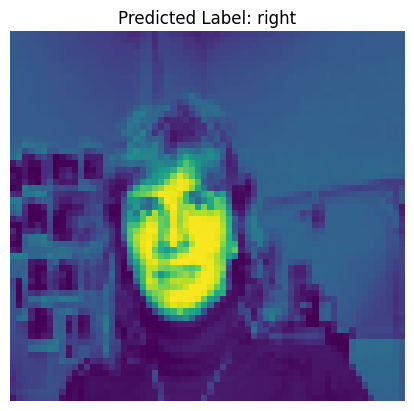

File Name: steffi_straight_neutral_open_2.pgm
Predicted Label: right


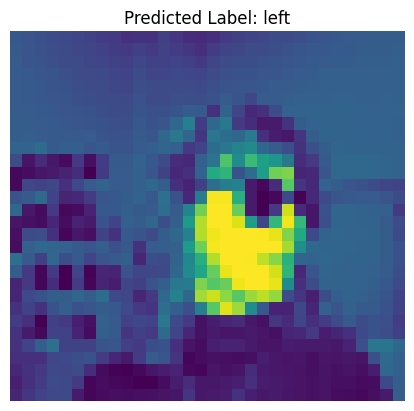

File Name: steffi_left_neutral_sunglasses_4.pgm
Predicted Label: left


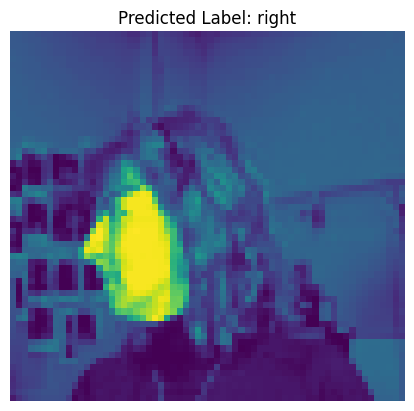

File Name: steffi_right_neutral_open_2.pgm
Predicted Label: right


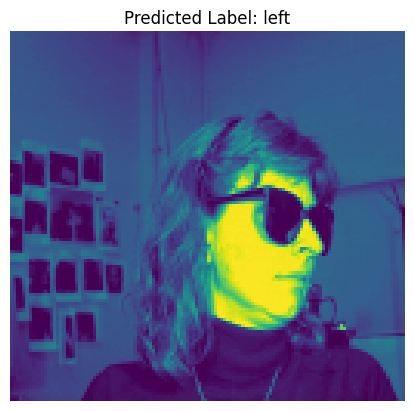

File Name: steffi_left_angry_sunglasses.pgm
Predicted Label: left


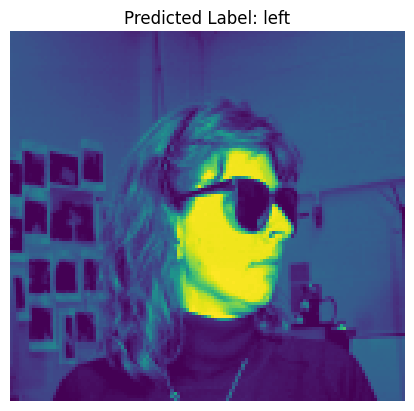

File Name: steffi_left_sad_sunglasses.pgm
Predicted Label: left


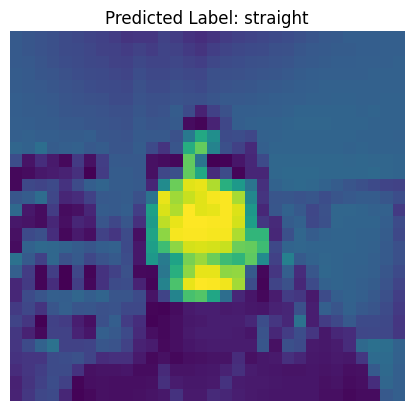

File Name: steffi_up_neutral_sunglasses_4.pgm
Predicted Label: straight


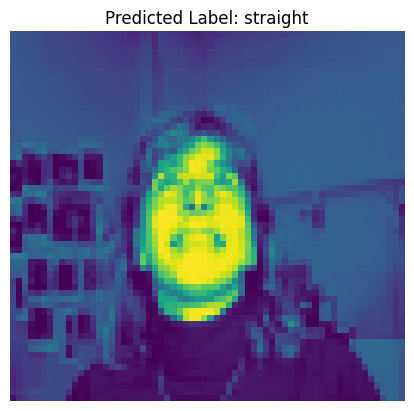

File Name: steffi_up_happy_open_2.pgm
Predicted Label: straight


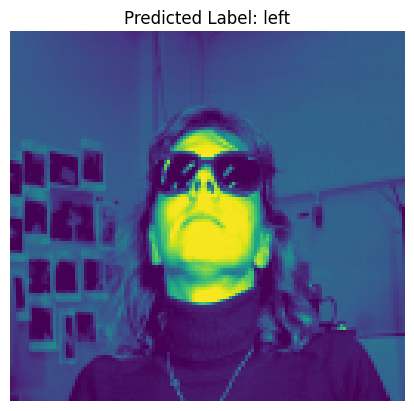

File Name: steffi_up_sad_sunglasses.pgm
Predicted Label: left


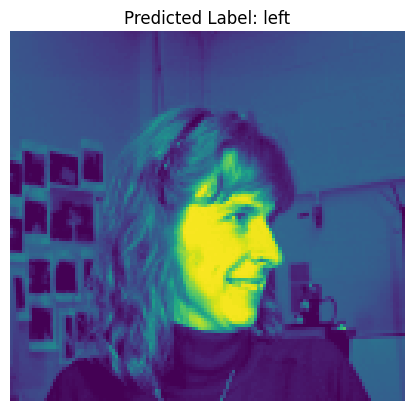

File Name: steffi_left_happy_open.pgm
Predicted Label: left


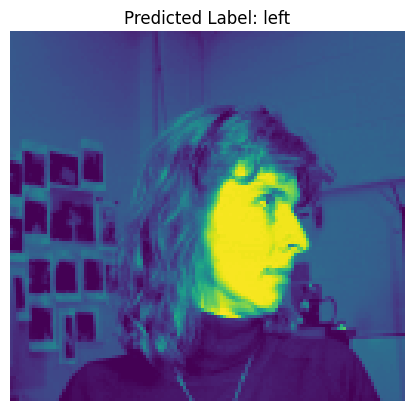

File Name: steffi_left_sad_open.pgm
Predicted Label: left


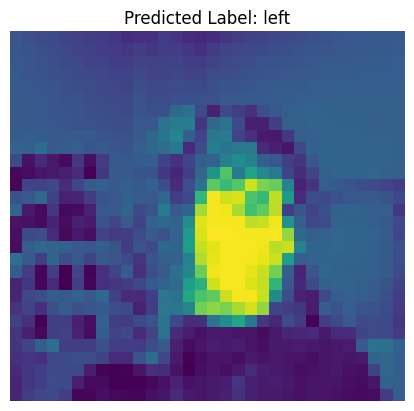

File Name: steffi_left_angry_open_4.pgm
Predicted Label: left


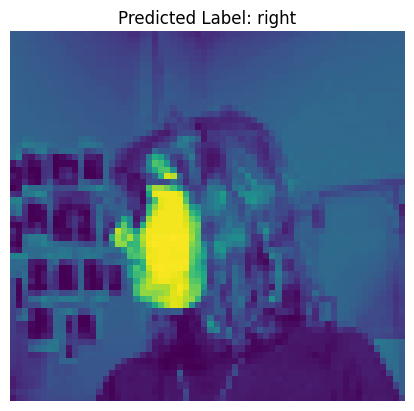

File Name: steffi_right_neutral_sunglasses_2.pgm
Predicted Label: right


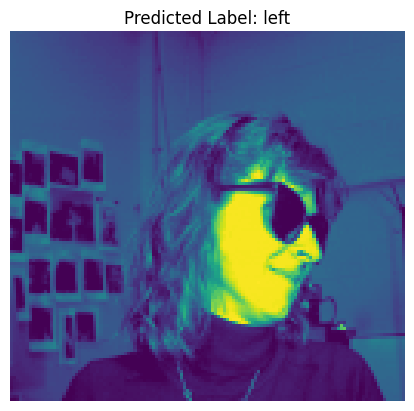

File Name: steffi_left_happy_sunglasses.pgm
Predicted Label: left


In [5]:
import os
import requests
from bs4 import BeautifulSoup
import numpy as np
import cv2
import re
import pickle
import matplotlib.pyplot as plt
from PIL import Image



class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_hidden = np.zeros((1, self.hidden_size))
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_output = np.zeros((1, self.output_size))

    def forward(self, inputs):
        # Forward pass
        self.hidden_sum = np.dot(inputs, self.weights_input_hidden) + self.bias_hidden
        self.hidden_activation = self.sigmoid(self.hidden_sum)

        self.output_sum = np.dot(self.hidden_activation, self.weights_hidden_output) + self.bias_output
        self.output = self.softmax(self.output_sum)

        return self.output

    def backward(self, inputs, targets, learning_rate):
        # Backward pass
        output_error = targets - self.output

        # Calculate gradients
        output_delta = output_error
        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_activation)

        # Update weights and biases
        self.weights_hidden_output += np.dot(self.hidden_activation.T, output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += np.dot(inputs.T, hidden_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def softmax(self, x):
        exp_values = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_values / np.sum(exp_values, axis=1, keepdims=True)

    def train(self, X_train, y_train_encoded, epochs=1000, learning_rate=0.003):
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X_train)

            # Backward pass
            self.backward(X_train, y_train_encoded, learning_rate)

            # Print error every 100 epochs
            if epoch % 100 == 0:
                error = np.mean(np.square(y_train_encoded - output))
                print(f'Error at epoch {epoch}: {error}')

    def evaluate_accuracy(self, X_test, y_test_encoded):
        # Predict on X_test
        predictions = self.forward(X_test)

        # Round the predictions for binary classification or use argmax for multiclass
        rounded_predictions = np.round(predictions)  # For binary classification

        # Calculate accuracy
        if rounded_predictions.shape == y_test_encoded.shape:
            accuracy = np.mean(np.all(rounded_predictions == y_test_encoded, axis=1))
            print("Accuracy:", accuracy)
        else:
            print("Shapes of predictions and y_test_encoded do not match.")

# Function to load the model
def load_model(directory, filename):
    filepath = os.path.join(directory, filename)
    with open(filepath, 'rb') as file:
        model = pickle.load(file)
    print(f"Model loaded from {filepath}")
    return model

# Function to resize images to 32x30 and normalize to [0,1]
def resize_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    resized_img = cv2.resize(img, (32, 30))
    return resized_img / 255.0

# Function to parse labels from filenames
def parse_label(filename):
    label_match = re.search(r'_(.*?)_', filename)
    if label_match:
        primary_label = label_match.group(1)
        return primary_label
    return None

# Function to display images with predictions
def display_images_with_predictions(names, predictions, reverse_label_map, path, max_images=20):
    try:
        count = 0
        for file_name, prediction in zip(names, predictions):
            predicted_label = reverse_label_map[tuple(np.round(prediction))]
            count += 1
            if count > max_images:
                break
            img = Image.open(path + file_name)
            plt.imshow(img)
            plt.title(f"Predicted Label: {predicted_label}")
            plt.axis('off')
            plt.show()
            print("File Name:", file_name)
            print("Predicted Label:", predicted_label)
    except Exception as e:
        print("Error:", e)
        print("Completed")

# Load the trained model
nn_loaded = load_model('/googledrive/MyDrive/GSSOC24/ThereForYou', 'neural_network_model.pkl')

# Load new dataset for prediction
data_path = "/content/predict/"
image_files = os.listdir(data_path)
predict_images = []
name_list = []
for file in image_files:
    if file.endswith(".pgm"):
        image_path = os.path.join(data_path, file)
        name_list.append(file)
        resized_image = resize_image(image_path)
        predict_images.append(resized_image.flatten())

# Convert to numpy arrays
name_list = np.array(name_list)
predict_images = np.array(predict_images)

# Perform predictions
predictions = nn_loaded.forward(predict_images)

# Define the label map
label_map = {'straight': [1, 0, 0, 0], 'up': [0, 1, 0, 0], 'left': [0, 0, 1, 0], 'right': [0, 0, 0, 1]}
reverse_label_map = {(1, 0, 0, 0): 'straight', (0, 1, 0, 0): 'up', (0, 0, 1, 0): 'left', (0, 0, 0, 1): 'right'}

# Display images with predictions
display_images_with_predictions(name_list, predictions, reverse_label_map, path=data_path, max_images=20)


In [2]:
from google.colab import drive
drive.mount('/googledrive')

Mounted at /googledrive
